In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load 
CityData = "data/city_data.csv"
RideData = "data/ride_data.csv"

# Read the City and Ride Data
City = pd.read_csv (CityData)
Ride = pd.read_csv (RideData)

# Combine the data into a single dataset
merge_table = pd.merge(City, Ride, on="city")
merge_table2 = merge_table.dropna(how='any')
# Display the data table for preview
merge_table2.head()

,city,driver_count,type,date,fare,ride_id
0,Richardfort,38,Urban,2018-02-24 08:40:38,13.93,5628545007794
1,Richardfort,38,Urban,2018-02-13 12:46:07,14.00,910050116494
2,Richardfort,38,Urban,2018-02-16 13:52:19,17.92,820639054416
3,Richardfort,38,Urban,2018-02-01 20:18:28,10.26,9554935945413
4,Richardfort,38,Urban,2018-04-17 02:26:37,23.00,720020655850


## Bubble Plot of Ride Sharing Data

In [2]:

Urban = merge_table2.loc[merge_table2["type"] == "Urban", :]
Suburban = merge_table2.loc[merge_table2["type"] == "Suburban", :]
Rural = merge_table2.loc[merge_table2["type"] == "Rural", :]



<function matplotlib.pyplot.show(*args, **kw)>

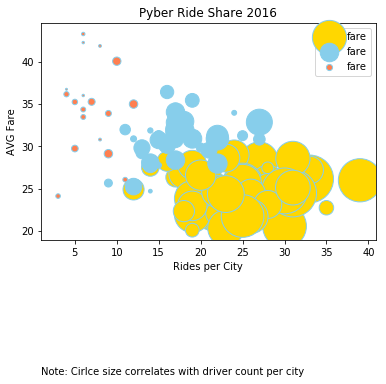

In [12]:
#City Type 
Urban = merge_table2.loc[merge_table2["type"] == "Urban", :]
Suburban = merge_table2.loc[merge_table2["type"] == "Suburban", :]
Rural = merge_table2.loc[merge_table2["type"] == "Rural", :]

#AVG Fare per city -Urban
UC = Urban.groupby(['city'])
UM = UC["fare"].mean()

#AVG Fare per city -Suburban
SC = Suburban.groupby(['city'])
SM = SC["fare"].mean()

#AVG Fare Per City - Rual 
RC = Rural.groupby(['city'])
RM = RC["fare"].mean()

# Total # of Rides Per city 
UR = Urban.groupby(['city'])
URR = UR["ride_id"].count() #Urban

SR = Suburban.groupby(['city'])
SRR = SR["ride_id"].count() #Suburban

RR = Rural.groupby(['city'])
RRR = RR["ride_id"].count() #Suburban


#Total # of Drivers per city 
UD = UC["driver_count"].sum() #Urban
SD = SC["driver_count"].sum() #Suburban
RD = RC["driver_count"].sum() #Rural 

#Build the scatter plots for each city types
plt.scatter(URR, UM, UD, marker="o", facecolors="gold", edgecolors="skyblue") #Urban
plt.scatter(SRR, SM, SD, marker="o", facecolors="skyblue", edgecolors="skyblue") #Suburban
plt.scatter(RRR, RM, RD, marker="o", facecolors="coral", edgecolors="skyblue") #Rural

# Incorporate the other graph properties
plt.title("Pyber Ride Share 2016")
plt.xlabel("Rides per City")
plt.ylabel("AVG Fare")

# Create a legend
plt.legend(loc=1)

# Incorporate a text label regarding circle size
plt.text(.95, 3, r'Note: Cirlce size correlates with driver count per city')

# Save Figure
plt.savefig("../Matplot/pyber0.png")
plt.show

## Total Fares by City Type

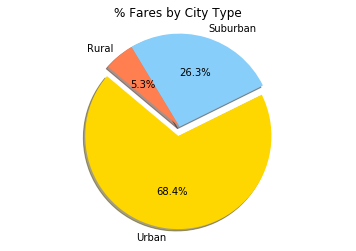

In [4]:
# Calculate Type Percents

UFare = Urban["fare"].count()
SFare = Suburban["fare"].count()
RFare = Rural["fare"].count()
TFare = merge_table2['fare'].count()


uper = UFare/TFare
sper = SFare/TFare
rper = RFare/TFare

Types = ["Urban", "Suburban", "Rural"]
AvgF = [uper, sper, rper]
colors = ["gold", "lightskyblue", "coral"]
explode = (0.1,0,0)

# Build Pie Chart
#plt.pie(AvgF, explode=explode, labels=Types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.pie(AvgF, explode=explode, labels=Types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.axis("equal")
plt.title("% Fares by City Type")

# Save Figure
plt.savefig("../Matplot/pyber1.png")
plt.show()


## Total Rides by City Type

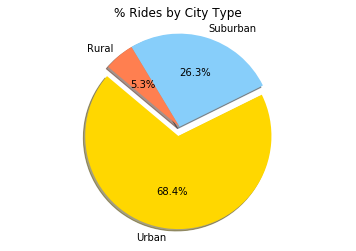

In [5]:
# Calculate Ride Percents
URide = Urban['ride_id'].count()
SRide = Suburban['ride_id'].count()
RRide = Rural['ride_id'].count()
TRide = merge_table2['ride_id'].count()

UR = URide/TRide
SR = SRide/TRide
RR = RRide/TRide

# Build Pie Chart

Types = ["Urban", "Suburban", "Rural"]
RPC = [uper, sper, rper]
colors = ["gold", "lightskyblue", "coral"]
explode = (0.1,0,0)

plt.pie(RPC, explode=explode, labels=Types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% Rides by City Type")

# Save Figure
plt.savefig("../Matplot/pyber2.png")
plt.show()

## Total Drivers by City Type

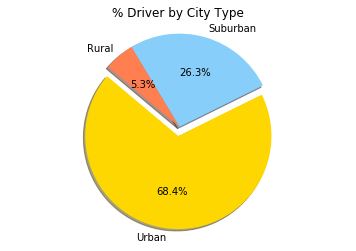

In [6]:
# Calculate Driver Percents
Udrive = Urban['driver_count'].value_counts()
Sdrive = Suburban['driver_count'].value_counts()
Rdrive = Rural['driver_count'].value_counts()
Tdrive = merge_table2['driver_count'].value_counts()

DU = Urban["driver_count"].count()
DS = Suburban["driver_count"].count()
DR = Rural["driver_count"].count()

UD = Udrive/Tdrive
SR = Sdrive/Tdrive
RR = Rdrive/Tdrive

# Build Pie Charts
Types = ["Urban", "Suburban", "Rural"]
DP = [uper, sper, rper]

colors = ["gold", "lightskyblue", "coral"]
explode = (0.1,0,0)

plt.pie(DP, explode=explode, labels=Types, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")
plt.title("% Driver by City Type")


# Save Figure
plt.savefig("../Matplot/pyber3.png")
plt.show()
